# Tutorial 10 - Clustering

### Lecture and Tutorial Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:

* Describe a case where clustering would be an appropriate tool, and what insight it would bring from the data.
* Explain the k-means clustering algorithm.
* Interpret the output of a k-means cluster analysis.
* Perform k-means clustering in R using `k-means`
* Visualize the output of k-means clustering in R using a coloured scatter plot 
* Identify when it is necessary to scale variables before clustering and do this using R
* Use the elbow method to choose the number of clusters for k-means
* Describe advantages, limitations and assumptions of the kmeans clustering algorithm.

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(GGally)
library(broom)
options(repr.matrix.max.rows = 6)
source('tests.R')
source("cleanup.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




# 1. Pokemon

We will be working with the Pokemon dataset from Kaggle, which can be found [here.](https://www.kaggle.com/abcsds/pokemon)
This dataset compiles the statistics on 721 Pokemon. The information in this dataset includes Pokemon name, type, health points, attack strength, defensive strength, speed points etc. These are values that apply to a Pokemon's abilities (higher values are better). We are interested in seeing if there are any sub-groups/clusters of pokemon based on these statistics. And if so, how many sub-groups/clusters there are.

![](https://media.giphy.com/media/3oEduV4SOS9mmmIOkw/giphy.gif)

Source: https://media.giphy.com/media/3oEduV4SOS9mmmIOkw/giphy.gif


**Question 1.0**
<br> {points: 1}

Use `read_csv` to load `pokemon.csv` from the `data/` folder.

*Assign your answer to an object called `pm_data`.*

In [2]:
# your code here
pm_data <- read_csv("data/pokemon.csv")# No Answer - remove if you provide an answer
pm_data

Rows: 800 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Name, Type 1, Type 2
dbl (9): #, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation
lgl (1): Legendary

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,TRUE
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,TRUE
721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,TRUE


In [3]:
test_1.0()

Test passed 🎉
Test passed 😀
Test passed 🥇
Test passed 😀
[1] "Success!"


**Question 1.1**
<br> {points: 1}

Create a matrix of plots using `ggpairs`, choosing columns 5 to 11 (or equivalently, columns `Total` to `Speed`) from `pm_data`. First use the `select` function to extract columns `"Total":"Speed"`, and then pass the resulting dataframe to `ggpairs` to plot.

*Assign your answer to an object called `pm_pairs`.*

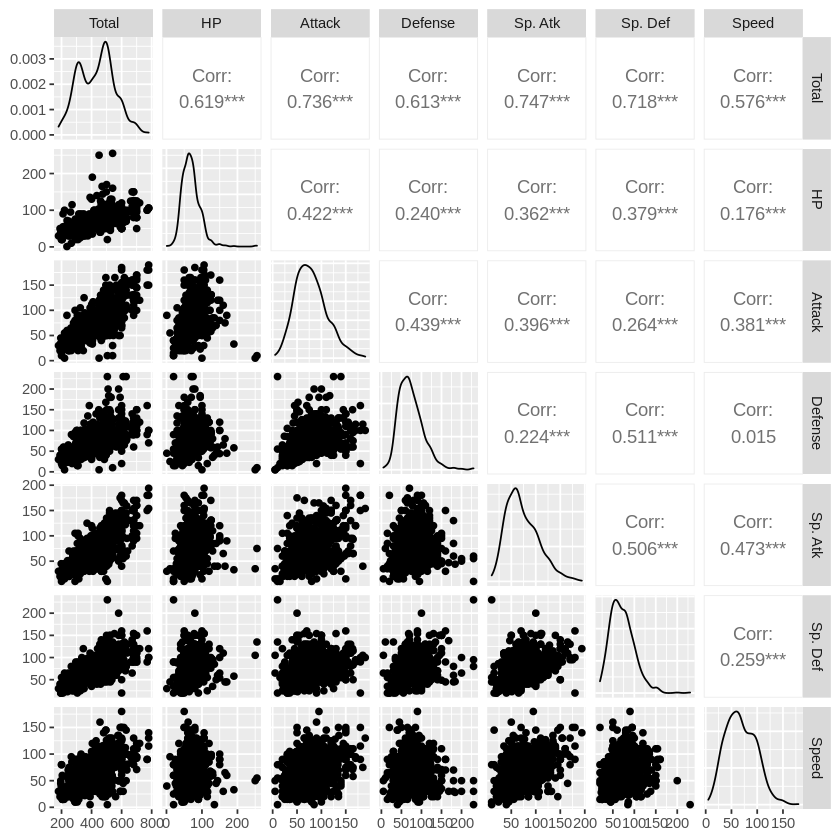

In [4]:
# your code here
pm_pairs <- pm_data |>
            select("Total":"Speed") |>
            ggpairs()#No Answer - remove if you provide an answer
pm_pairs

In [5]:
test_1.1()

Test passed 😀
Test passed 🎊
Test passed 🌈
Test passed 😀
[1] "Success!"


**Question 1.2** 
<br> {points: 1}

Select the columns `Speed` and `Defense`, creating a new dataframe with only those columns.

*Assign your answer to an object named `km_data`.*

In [6]:
# your code here
km_data <- pm_data |>
           select("Speed","Defense")# No Answer - remove if you provide an answer
km_data

Speed,Defense
<dbl>,<dbl>
45,49
60,63
80,83
⋮,⋮
70,60
80,60
70,120


In [7]:
test_1.2()

Test passed 😀
Test passed 😀
[1] "Success!"


**Question 1.3**
<br> {points: 1}

Make a scatterplot to visualize the relationship between `Speed` and `Defense` of the Pokemon. Put the `Speed` variable on the x-axis, and the `Defense` variable on the y-axis.

*Assign your plot to an object called `pm_scatter`. Don't forget to do everything needed to make an effective visualization.*

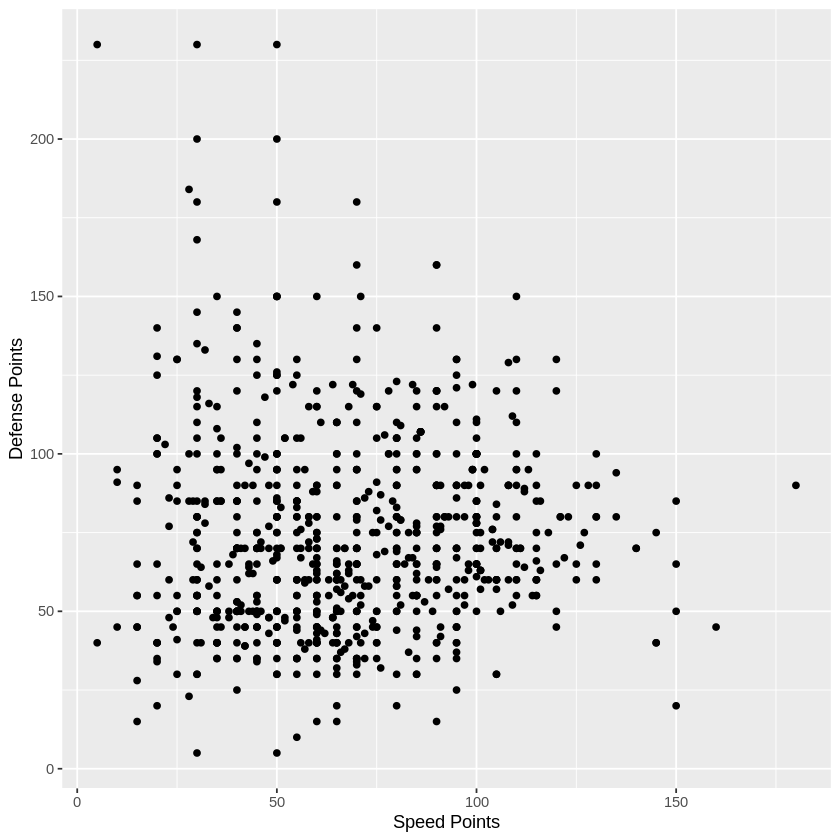

In [8]:
# your code here
pm_scatter <- km_data |>
              ggplot(aes(x=Speed,y=Defense)) +
              geom_point() +
              labs(x="Speed Points",y="Defense Points")# No Answer - remove if you provide an answer
pm_scatter

In [9]:
test_1.3()

Test passed 😸
Test passed 🥇
Test passed 🎉
Test passed 🎉
Test passed 🥇
[1] "Success!"


**Question 1.4.1** 
<br> {points: 3}

We are going to cluster the Pokemon based on their `Speed` and `Defense`. Will it matter much for our clustering if we scale our variables? Is there any argument against scaling here?

Scaling the variables will not affect the clustering that much. It won't affect the clustering that much because the two variables are simillar in units and the change from each variable has about the same "weight". However, it is good practice to always standardize data when  processing the dataset.

**Question 1.4.2**
<br> {points: 1}

Now, let's use the `kmeans` function to cluster the Pokemon based on their `Speed` and `Defense` variables. For this question, use $k$ = 4. As good practice, let's standardize the data here first using `scale`. Name the standardized data `scaled_km_data`.

*Assign your answer to an object called `pokemon_clusters`.*

**Note:** We set the random seed here because `kmeans` initializes observations to random clusters.

In [10]:
#DON'T CHANGE THE SEED VALUE BELOW!
set.seed(2019)
scaled_km_data <- km_data |>
                  mutate(across(Speed:Defense,scale))
pokemon_clusters <- kmeans(scaled_km_data,centers=4)
# your code here
 # No Answer - remove if you provide an answer
pokemon_clusters

K-means clustering with 4 clusters of sizes 259, 180, 99, 262

Cluster means:
       Speed     Defense
1 -0.5486990 -0.89261236
2 -0.7505326  0.31771609
3 -0.1256427  1.86306518
4  1.1055250 -0.03986927

Clustering vector:
  [1] 1 1 4 3 1 4 4 4 4 2 2 3 3 1 1 1 1 1 1 4 1 1 4 4 1 4 1 4 1 4 4 4 2 3 1 2 4
 [38] 1 1 4 1 2 1 4 1 1 1 4 1 2 2 1 2 1 4 4 4 4 4 1 4 1 4 1 4 4 4 2 1 4 4 4 1 2
 [75] 2 1 1 1 1 4 2 2 3 4 4 2 2 3 2 2 1 1 4 1 2 1 2 2 3 1 4 4 4 3 1 2 2 3 4 4 2
[112] 2 2 2 4 4 2 2 3 2 3 1 3 4 4 2 4 1 1 4 4 4 4 4 4 4 4 3 4 4 4 3 2 1 1 1 4 1
[149] 2 2 3 2 3 4 4 2 4 4 4 1 1 4 4 4 4 4 2 2 4 1 4 4 2 2 3 1 4 1 1 1 4 1 2 4 1
[186] 1 1 1 1 2 2 1 4 1 1 2 2 2 1 2 2 2 1 1 4 4 1 1 4 1 2 4 3 4 2 4 1 1 4 2 3 2
[223] 3 3 3 1 2 4 2 3 3 4 3 4 1 2 1 3 1 2 2 1 2 1 2 3 1 4 4 4 1 3 2 4 1 1 2 1 4
[260] 1 4 1 4 4 3 1 2 3 3 3 4 4 1 4 4 4 1 1 4 4 1 2 2 3 1 2 1 4 1 1 1 1 2 1 1 2
[297] 1 1 4 1 4 1 2 1 1 4 4 1 1 1 2 1 4 4 2 4 1 1 1 1 1 1 1 3 1 1 2 3 2 3 2 3 3
[334] 3 1 4 4 1 4 4 4 4 4 4 1 1 2 1 4 4 1 1 1 2 2 3 1 4 1

In [11]:
test_1.4.2()

Test passed 🥇
Test passed 😀
Test passed 🎊
[1] "Success!"


**Question 1.5**
<br> {points: 1}

Let's visualize the clusters we built in `pokemon_clusters`. For this we can use the `broom` package.

> "The broom package takes the messy output of built-in functions in R, such as lm, nls, or t.test, and turns them into tidy data frames." - [Broom Package](https://cran.r-project.org/web/packages/broom/vignettes/broom.html)

Your tasks:

1. Use the `augment` function create a data frame with the cluster assignments for each data point from k-means (should have the columns `Speed` and `Defense` and `.cluster`). 
2. Create a scatter plot of `Speed` (x-axis) vs `Defense` (y-axis) with the points coloured by their cluster assignment. 

Name this plot `answer1.5`.

Speed,Defense,.cluster
"<dbl[,1]>","<dbl[,1]>",<fct>
-0.8010021,-0.7966553,1
-0.2848371,-0.3476999,1
0.4033830,0.2936649,4
⋮,⋮,⋮
0.05927295,-0.4439046,1
0.40338296,-0.4439046,4
0.05927295,1.4801898,3


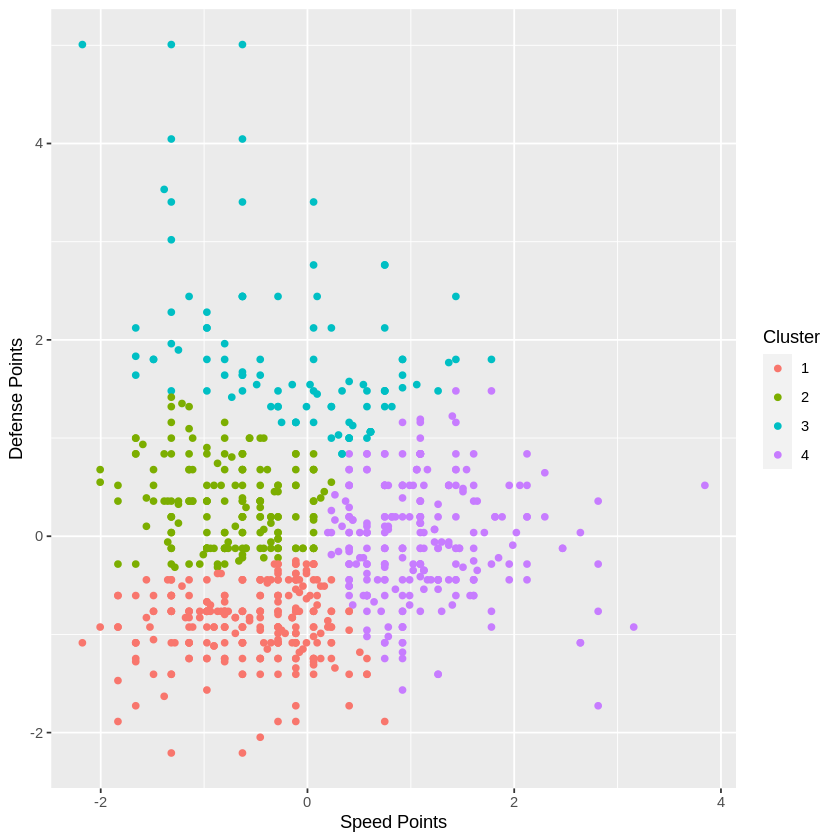

In [12]:
# your code here
tidy_pokemon_clusters <- augment(pokemon_clusters,scaled_km_data)
tidy_pokemon_clusters
answer1.5 <- tidy_pokemon_clusters |>
             ggplot(aes(x=Speed,y=Defense,color=.cluster))+
             geom_point() +
             labs(x="Speed Points",y="Defense Points",color="Cluster")
 # No Answer - remove if you provide an answer
answer1.5

In [13]:
test_1.5()

Test passed 🥇
Test passed 🌈
Test passed 😸
Test passed 🥳
Test passed 😀
[1] "Success!"


**Question 1.6**
<br> {points: 3}

Below you can see multiple initializations of k-means with different seeds for `K = 4`. Can you explain what is happening and how we can mitigate this in the `kmeans` function?

![](imgs/multiple_initializations.png)

The clustering here shows multiple cases where the clustering is set with a different intialization, this leads to different results in the clustering. This can be mitigated by using the nstart function which runs the clustering multiple times and returns the best result from the multiple runs of the clustering models.

**Question 1.7**
<br> {points: 1}

We know that choosing a $k$ is an important step of the process. We can do this by examining how the total within-cluster sum of squares changes as we change $k$ on a plot (which we call an elbow plot).

For this exercise, from $k$ = 1 to $k$ = 10, you will calculate the total within-cluster sum of squares:

1. following good practice, make sure you are using the standardized data (`scaled_km_data`)
2. create a tibble with the $k$ values
3. create a new column `poke_clusts` by applying `kmeans` to each value of `k` (set `nstart` to be 10)
4. create a new column `glanced` by applying `glance` to each of the results
5. remove the `poke_clusts` column
6. `unnest` the results of `glance`


*Assign your answer to a tibble object named `elbow_stats`. It should have the columns `k`, `totss`, `tot.withinss`, `betweenss`, and `iter`.*

Remember, to acess the  total within-cluster sum of squares, you can use the `glance` function also from the `broom` package:

In [14]:
glance(pokemon_clusters)

totss,tot.withinss,betweenss,iter
<dbl>,<dbl>,<dbl>,<int>
1598,528.2769,1069.723,3


In [15]:
set.seed(2020) # DO NOT REMOVE
pokemon_ks <- tibble(k=1:10)

pokemon_stats <- pokemon_ks |>
                 rowwise() |>
                 mutate(poke_clusts=list(kmeans(scaled_km_data,nstart=10,k))) |>
                 mutate(glanced = list(glance(poke_clusts))) |>
                 select(-poke_clusts)
print(pokemon_stats)
elbow_stats <- pokemon_stats |>
                          unnest(glanced)

print(elbow_stats)

# your code here
 # No Answer - remove if you provide an answer
elbow_stats

# A tibble: 10 × 2
# Rowwise: 
       k glanced         
   <int> <list>          
 1     1 <tibble [1 × 4]>
 2     2 <tibble [1 × 4]>
 3     3 <tibble [1 × 4]>
 4     4 <tibble [1 × 4]>
 5     5 <tibble [1 × 4]>
 6     6 <tibble [1 × 4]>
 7     7 <tibble [1 × 4]>
 8     8 <tibble [1 × 4]>
 9     9 <tibble [1 × 4]>
10    10 <tibble [1 × 4]>
# A tibble: 10 × 5
       k totss tot.withinss betweenss  iter
   <int> <dbl>        <dbl>     <dbl> <int>
 1     1  1598        1598.  2.05e-12     1
 2     2  1598        1031.  5.67e+ 2     1
 3     3  1598         640.  9.58e+ 2     3
 4     4  1598         528.  1.07e+ 3     3
 5     5  1598         429.  1.17e+ 3     4
 6     6  1598         346.  1.25e+ 3     6
 7     7  1598         307.  1.29e+ 3     3
 8     8  1598         270.  1.33e+ 3     4
 9     9  1598         236.  1.36e+ 3     4
10    10  1598         214.  1.38e+ 3     6


k,totss,tot.withinss,betweenss,iter
<int>,<dbl>,<dbl>,<dbl>,<int>
1,1598,1598.0000,2.046363e-12,1
2,1598,1031.4596,5.665404e+02,1
3,1598,640.4274,9.575726e+02,3
⋮,⋮,⋮,⋮,⋮
8,1598,269.9280,1328.072,4
9,1598,235.8644,1362.136,4
10,1598,214.3482,1383.652,6


In [16]:
test_1.7()

Test passed 😀
Test passed 🎉
Test passed 🥳
[1] "Success!"


**Question 1.8**
<br> {points: 1}

Create the elbow plot. Put the within-cluster sum of squares on the y-axis, and the number of clusters on the x-axis.

*Assign your plot to an object called `elbow_plot`*.

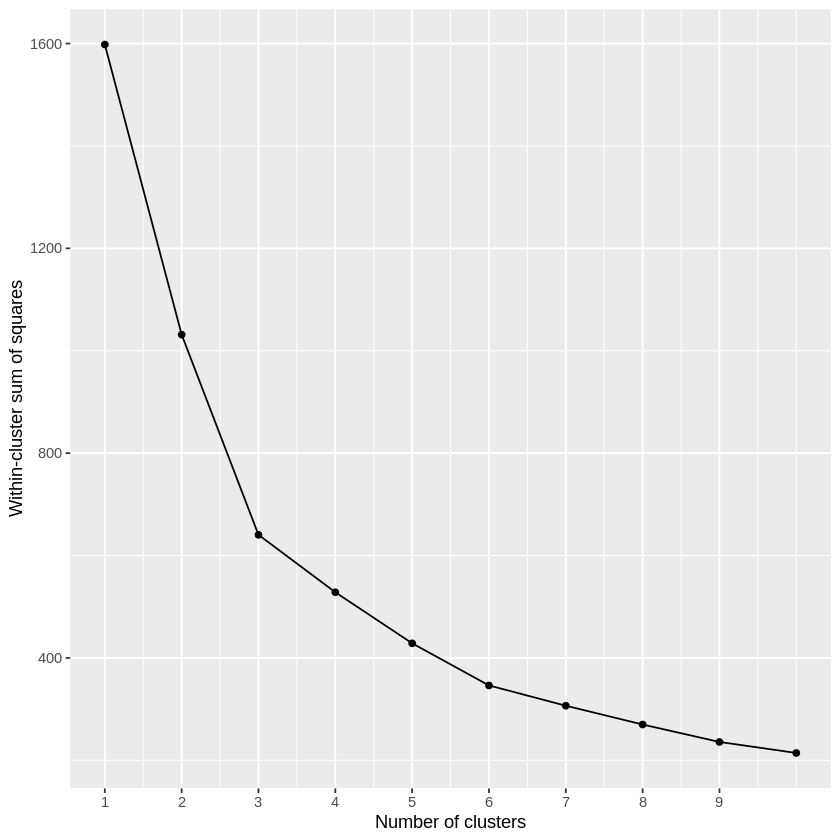

In [17]:
# your code here
elbow_plot <- elbow_stats |>
              ggplot(aes(x=k,y=tot.withinss)) +
              geom_point() +
              geom_line() +
              scale_x_continuous(breaks=1:9)+
              labs(x="Number of clusters",y="Within-cluster sum of squares")
             
# No Answer - remove if you provide an answer
elbow_plot

In [18]:
test_1.8()

Test passed 😸
Test passed 🌈
Test passed 🎉
Test passed 🥳
Test passed 🌈
[1] "Success!"


**Question 1.9** 
<br> {points: 3}

Based on the elbow plot above, what value of $k$ do you choose? Explain why.

I would choose k=3 as the k value because it is where the elbow is in this plot. This is where the rest of the points change with less and less WSSD as the number of clusters increase. If we were to choose any point after 3 the WSSD would only decrease by a diminishing amount.

**Question 1.10**
<br> {points: 3}

Using the value that you chose for k, perform the k-means algorithm, set `nstart = 10` and assign your answer to an object called `pokemon_final_kmeans`. 

Augment the data with the final cluster labels and assign your answer to an object called `pokemon_final_clusters`. 

Finally, create a plot called `pokemon_final_clusters_plot` to visualize the clusters. Include a title, colour the points by the cluster and make sure your axes are human-readable.

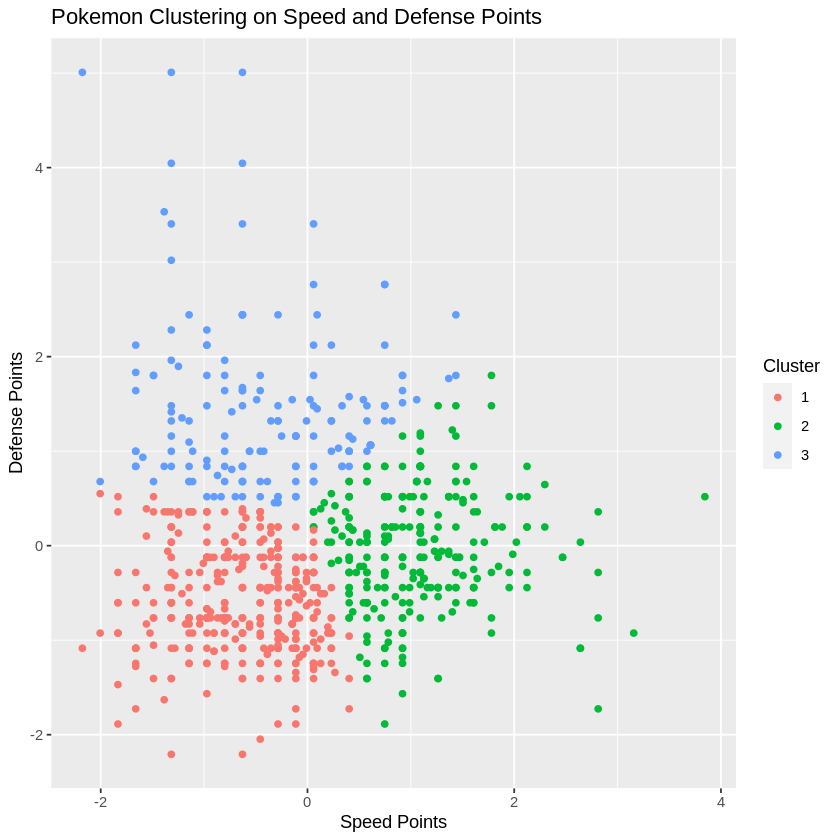

In [19]:
set.seed(2019) # DO NOT REMOVE 
pokemon_final_kmeans <- kmeans(scaled_km_data,nstart=10,centers=3)
pokemon_final_clusters <- augment(pokemon_final_kmeans,scaled_km_data)
pokemon_final_clusters_plot <- pokemon_final_clusters |>
                               ggplot(aes(x=Speed,y=Defense,color=.cluster)) +
                               geom_point() +
                               labs(x="Speed Points",y="Defense Points",color="Cluster") +
                               ggtitle("Pokemon Clustering on Speed and Defense Points")
# your code here
pokemon_final_clusters_plot # No Answer - remove if you provide an answer

**Question 1.11**
<br> {points: 3}

Using `Speed` and `Defense`, we find some number of clusters in our data. However, we have more information in our dataset that might be useful for clustering. Let's incorporate all of the numeric values to our k-means model. Again use `nstart = 10`.

Your tasks:

1. Select the numeric type columns only from the full data set `pm_data`. For example, do not include the `#` or `Generation`  columns etc. Assign your answer to an object called `pm_multi`.
2. Standardize the columns in `pm_multi` using `scale`.
2. From K = 1 to K = 10, calculate the total within-cluster sum of squares. Set `nstart` to be 10. Assign your answer to an object called `pm_multi_elbow_stats`. 
3. Use the elbow plot method to determine the number of clusters. Assign your answer to an object called `pm_multi_elbow_plot`.
4. Train a k-means model with the number of clusters determined in above. Assign your answer to an object called `multi_kmeans`. 
5. Print the cluster means for the trained model.

# A tibble: 10 × 5
       k totss tot.withinss betweenss  iter
   <int> <dbl>        <dbl>     <dbl> <int>
 1     1  5593        5593.  2.27e-11     1
 2     2  5593        3511.  2.08e+ 3     1
 3     3  5593        3033.  2.56e+ 3     3
 4     4  5593        2690.  2.90e+ 3     5
 5     5  5593        2452.  3.14e+ 3     6
 6     6  5593        2307.  3.29e+ 3     4
 7     7  5593        2184.  3.41e+ 3     4
 8     8  5593        2069.  3.52e+ 3     6
 9     9  5593        1958.  3.63e+ 3     5
10    10  5593        1865.  3.73e+ 3     6


K-means clustering with 3 clusters of sizes 291, 360, 149

Cluster means:
       Total         HP     Attack    Defense     Sp. Atk    Sp. Def
1 -1.0851804 -0.7517973 -0.7671034 -0.6844715 -0.73760572 -0.8112439
2  0.2902074  0.3358016  0.2073275  0.2867168  0.03300502  0.2457576
3  1.4182068  0.6569424  0.9972429  0.6440481  1.36081514  0.9905991
        Speed
1 -0.62043301
2  0.09119871
3  0.99137229

Clustering vector:
  [1] 1 2 2 3 1 2 3 3 3 1 2 2 3 1 1 2 1 1 2 2 1 1 2 3 1 2 1 2 1 2 1 2 1 2 1 1 2
 [38] 1 1 2 1 2 1 2 1 2 1 2 1 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 1 1 2 1 1 3 3 1 2
 [75] 2 1 1 2 1 2 1 2 2 2 2 1 2 3 1 2 1 1 2 1 2 1 2 1 2 1 1 3 3 1 1 2 1 2 1 2 1
[112] 2 1 2 2 2 2 1 2 1 2 2 2 2 3 1 2 1 2 1 2 2 2 2 2 2 2 3 2 1 2 3 2 1 1 2 3 3
[149] 2 1 2 1 2 2 3 2 3 3 3 1 2 3 3 3 3 3 1 2 2 1 2 3 1 2 2 1 2 1 2 1 2 1 2 2 1
[186] 2 1 1 1 1 2 1 2 1 1 2 3 2 1 2 2 2 1 1 2 1 1 2 1 1 2 3 2 2 2 2 1 2 2 1 2 2
[223] 2 2 2 1 2 2 2 3 2 2 3 2 1 2 1 2 1 2 1 1 2 1 2 2 1 2 3 3 1 2 2 2 1 1 2 1 1
[260] 1 2 2 3 

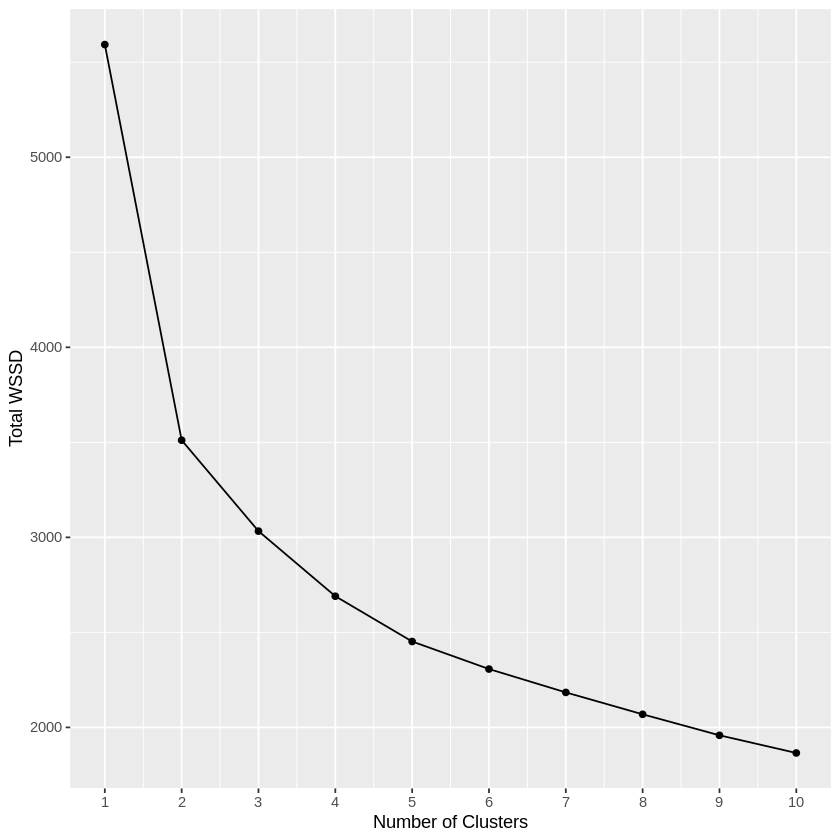

In [20]:
#DON'T CHANGE THIS SEED VALUE
set.seed(2019)
pm_multi <- pm_data |>
            select(Total:Speed)
pm_multi <- pm_multi |>
            mutate(across(Total:Speed,scale))
pm_k <- tibble(k=1:10)
pm_multi_elbow_stats <- pm_k |>
                        rowwise() |>
                        mutate(poke_clusters=list(kmeans(pm_multi,nstart=10,k))) |>
                        mutate(poke_stats = list(glance(poke_clusters))) |>
                        unnest(poke_stats) |>
                        select(-poke_clusters)
pm_multi_elbow_plot <- pm_multi_elbow_stats |>
                       ggplot(aes(x=k,y=tot.withinss))+
                       geom_point() +
                       geom_line() +
                       scale_x_continuous(breaks = 1:10) +
                       labs(x="Number of Clusters",y="Total WSSD")
multi_kmeans <- kmeans(pm_multi,nstart=10,centers=3)
pm_multi_elbow_plot
print(pm_multi_elbow_stats)
multi_kmeans
# your code here
 # No Answer - remove if you provide an answer

**Question 1.12** 
<br> {points: 3}

Visualizing these clusters is not a simple task given the high-dimensionality of the model. But do the cluster means output help? Justify your reasoning.

The cluster means show the different averages for each cluster, even if it is not possible to visualize these clusters, the cluster means do tell us something about each cluster. Since each numerical value is different from each other (one is negative, one is near zero and one is close to 1), you can tell that there is distinct groups for each cluster.

# 2. Tourism Reviews

![](https://media.giphy.com/media/xUNd9IsOQ4BSZPfnLG/giphy.gif)
Source: https://media.giphy.com/media/xUNd9IsOQ4BSZPfnLG/giphy.gif

The Ministry of Land, Infrastructure, Transport and Tourism of Japan is interested in knowing the type of tourists that visit East Asia. They know the [majority of their visitors come from this region](https://statistics.jnto.go.jp/en/graph/) and would like to stay competitive in the region to keep growing the tourism industry. For this, they have hired us to perform segmentation of the tourists. A [dataset from TripAdvisor](https://archive.ics.uci.edu/ml/datasets/Travel+Reviews) has been scraped and it's provided to you.

This dataset contains the following variables:

- User ID : Unique user id 
- Category 1 : Average user feedback on art galleries 
- Category 2 : Average user feedback on dance clubs 
- Category 3 : Average user feedback on juice bars 
- Category 4 : Average user feedback on restaurants 
- Category 5 : Average user feedback on museums 
- Category 6 : Average user feedback on resorts 
- Category 7 : Average user feedback on parks/picnic spots 
- Category 8 : Average user feedback on beaches 
- Category 9 : Average user feedback on theaters 
- Category 10 : Average user feedback on religious institutions

**Question 2.0**
<br> {points: 3}

Load the data set from https://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv and clean it so that only the Category # columns are in the data frame (i.e., remove the `User ID` column). 

Assign your answer to an object called `clean_reviews`.

In [21]:
# your code here
reviews <- read_csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv"))
clean_reviews <- reviews |>
                 select("Category 1":"Category 10")
clean_reviews
# No Answer - remove if you provide an answer

Rows: 980 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): User ID
dbl (10): Category 1, Category 2, Category 3, Category 4, Category 5, Catego...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46
0.93,0.56,1.13,0.51,1.34,2.36,3.18,2.87,1.34,2.40


In [22]:
test_that('Did not create an object called clean_reviews', {
    expect_true(exists("clean_reviews"))
})
# The remainder of the tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.


Test passed 😸


**Question 2.1**
<br> {points: 3}

Perform k-means and vary $k$ from 1 to 10 to identify the optimal number of clusters. Use `nstart = 100`. Assign your answer to a tibble object called `elbow_stats` that has the columns `k`, `totss`, `tot.withinss`, `betweenss`, and `iter`.  

Afterwards, create an elbow plot to help you choose $k$. Assign your answer to an object called `tourism_elbow_plot`.

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”


# A tibble: 10 × 5
       k totss tot.withinss betweenss  iter
   <int> <dbl>        <dbl>     <dbl> <int>
 1     1  9790        9790. -5.82e-11     1
 2     2  9790        7759.  2.03e+ 3     1
 3     3  9790        7091.  2.70e+ 3     3
 4     4  9790        6456.  3.33e+ 3     5
 5     5  9790        5986.  3.80e+ 3     4
 6     6  9790        5605.  4.18e+ 3     6
 7     7  9790        5301.  4.49e+ 3     5
 8     8  9790        5055.  4.73e+ 3     6
 9     9  9790        4842.  4.95e+ 3     9
10    10  9790        4678.  5.11e+ 3     6


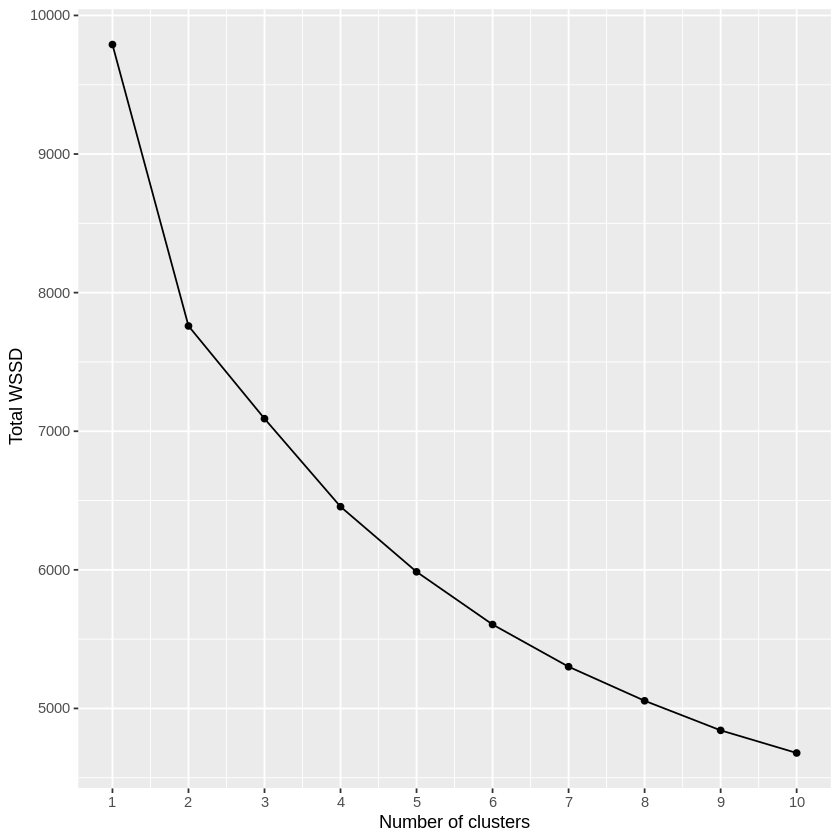

In [23]:
#DON'T CHANGE THIS SEED VALUE
set.seed(2019)
clean_reviews <- clean_reviews |>
                 map_df(scale)
review_k <- tibble(k=1:10)
elbow_stats <- review_k |>
               rowwise() |>
               mutate(clusters=list(kmeans(clean_reviews,nstart=100,k))) |>
               mutate(glanced=list(glance(clusters))) |>
               select(-clusters) |>
               unnest(glanced)
print(elbow_stats)
tourism_elbow_plot <- elbow_stats |>
                      ggplot(aes(x=k,y=tot.withinss)) +
                      geom_line() +
                      geom_point() +
                      scale_x_continuous(breaks=1:10)+
                      labs(x="Number of clusters",y=" Total WSSD")

tourism_elbow_plot
# your code here
 # No Answer - remove if you provide an answer

In [24]:
test_that('Did not create an object called elbow_stats', {
    expect_true(exists('elbow_stats'))
})
test_that('Did not create a plot called tourism_elbow_plot', {
    expect_true(exists('tourism_elbow_plot'))
})
# The remainder of the tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.

Test passed 😀
Test passed 🎉


**Question 2.2** 
<br> {points: 3}

From the elbow plot above, which $k$ should you choose? Explain why you chose that $k$.

I chose k = 2 becaues it is where the elbow forms on the plot above. This is where the rest of the points change with less and less WSSD as the number of clusters increase. If we were to choose any point  after 2 the WSSD would only decrease by a diminishing amount.

**Question 2.3**
<br> {points: 3}

Run kmeans again, with the optimal $k$, and assign your answer to an object called `reviews_clusters`. Use `nstart = 100`. Then, use the `augment` function to get the cluster assignments for each point. Name the data frame `cluster_assignments`.

In [25]:
#DONT CHANGE THIS SEED VALUE
set.seed(2019)
reviews_clusters <- kmeans(clean_reviews,nstart=100,3)
cluster_assignments <- augment(reviews_clusters,clean_reviews)
cluster_assignments
# your code here
# No Answer - remove if you provide an answer

Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,.cluster
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
0.1125872,0.9354094,1.6189231,0.312800143,-0.3194447,1.0696225,1.1580656,-0.3277049,0.6871667,-1.1799885,2
0.3878904,1.7717393,2.0881049,0.384297318,1.0979250,2.4782350,3.7141565,-1.4912948,0.7968671,-1.4911467,2
0.9996754,-1.1554154,-0.6001801,-0.008937147,-1.5996497,-0.5614024,-0.1199798,-0.2549805,-0.7115135,-0.9310618,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.8662688,-0.06818649,-0.4353324,-0.36642302,0.8235954,-0.1165774,-1.3980252,-0.1822562,-0.6292382,0.6869613,1
0.1125872,-2.40991027,-1.1200842,-0.36642302,-1.4624848,-2.6743211,-0.1199798,1.0540581,-1.2325904,-1.0555251,1
0.1125872,-1.65721334,0.1479747,-0.08043432,0.9150386,0.9584163,-0.1199798,0.2540900,-0.6292382,-1.2422201,2


For the following 2 questions use the following plot as reference. 

> The visualization below is a density plot, you can think of it as a smoothed version of a histogram. Density plots are more effective for comparing multiple distributions. What we are looking for with these visualizations, is to see which variables have difference distributions between the different clusters.

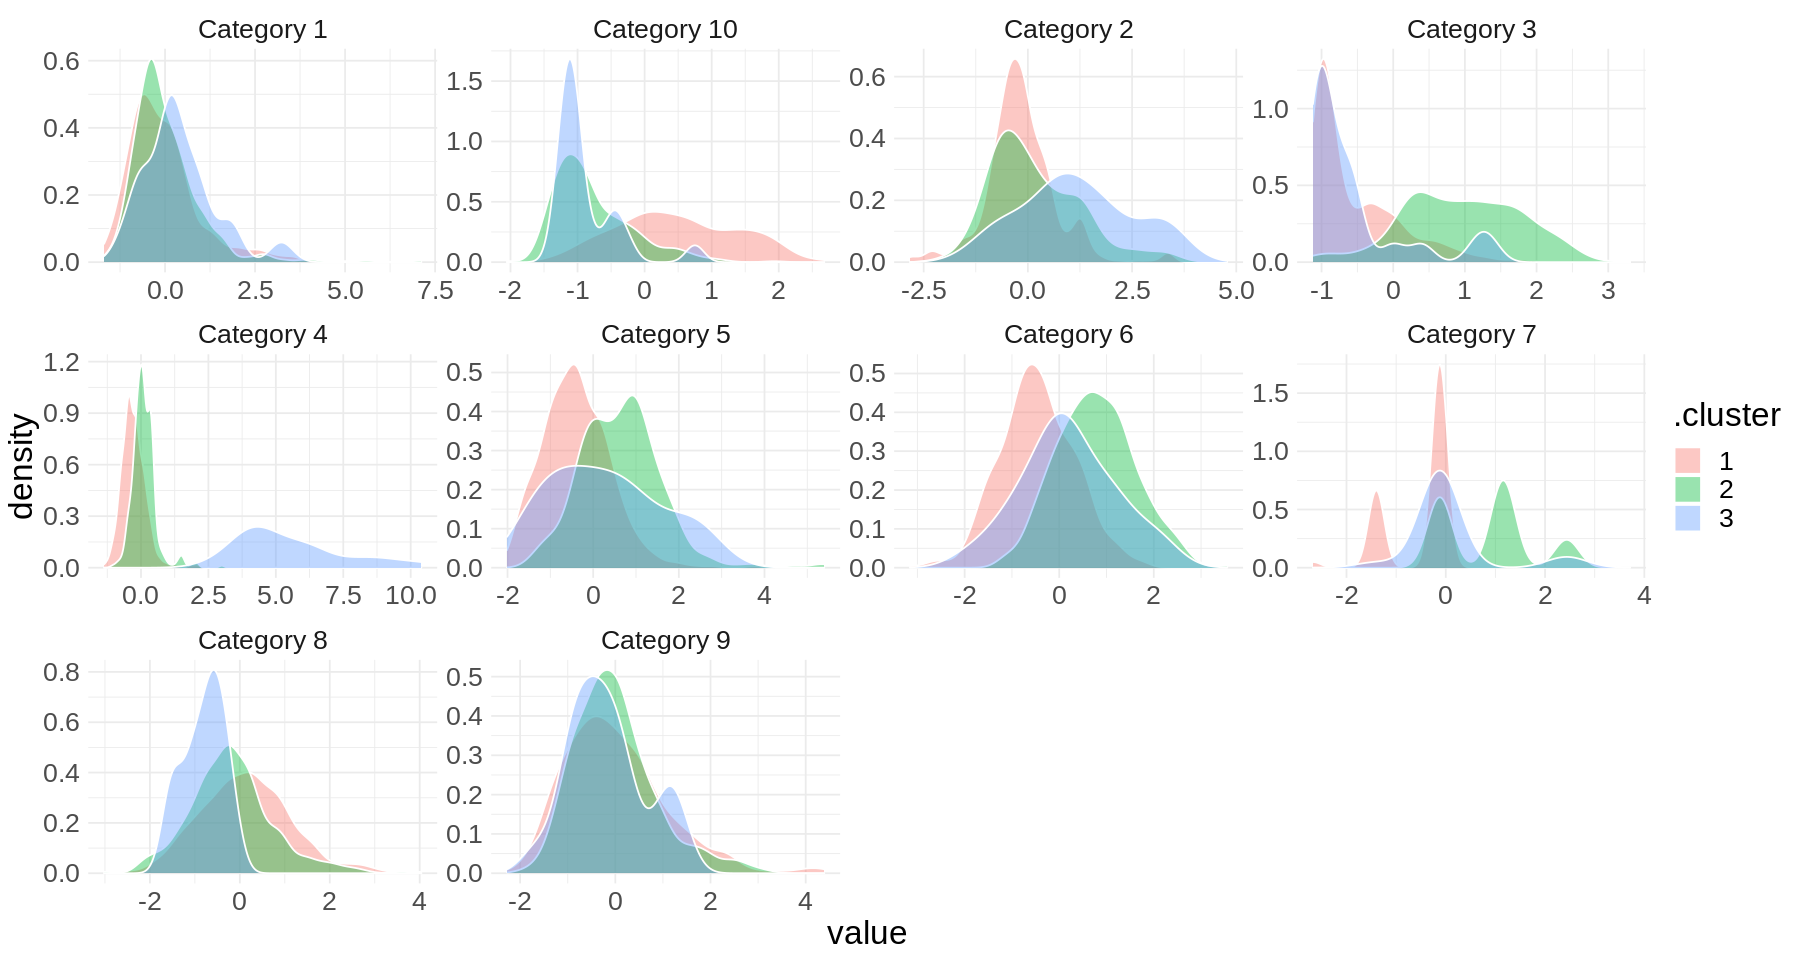

In [26]:
options(repr.plot.height = 8, repr.plot.width = 15)
cluster_assignments |>
    pivot_longer(cols = -.cluster, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = .cluster)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(~ category, scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 20))

**Question 2.4** Multiple Choice:
<br> {points: 1}

From the plots above, point out the categories that we might hypothesize are driving the clustering? (i.e., are useful to distinguish between the type of tourists?) We list the table of the categories below. 

- Category 1 : Average user feedback on art galleries 
- Category 2 : Average user feedback on dance clubs 
- Category 3 : Average user feedback on juice bars 
- Category 4 : Average user feedback on restaurants 
- Category 5 : Average user feedback on museums 
- Category 6 : Average user feedback on resorts 
- Category 7 : Average user feedback on parks/picnic spots 
- Category 8 : Average user feedback on beaches 
- Category 9 : Average user feedback on theaters 
- Category 10 : Average user feedback on religious institutions

A. 10, 3, 5, 6, 7

B. 10, 3, 5, 6, 1

C. 10, 3, 4, 6, 7

D. 10, 2, 5, 6, 7

*Assign your answer to an object called `answer2.4`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [27]:
# your code here() # No Answer - remove if you provide an answer
answer2.4 <- "A"

In [28]:
test_that('Did not create an object called answer2.4', {
    expect_true(exists('answer2.4'))
    })
# The remainder of the tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.


Test passed 🌈


**Question 2.5** 
<br> {points: 3}

Discuss one disadvantage of not being able to visualize the clusters when dealing with multidimensional data.

One disadvantage of not being able to visualize clusters is that you cannot see how the data is being seperated from each variable that is added. One variable could be "pulling" the centres into it that is more sensitive than other variables. Since we use clustering to visualize any patterns between groups of data, not being able to see them visually makes it hard to find these patterns.

In [29]:
source("cleanup.R")